In [1]:
import os
import numpy as np
from PIL import Image
import torchvision.transforms as transforms

In [2]:
import pandas as pd

root_dir = '/root/'
local_path = 'project/data/' # store the related data files in this folder
ResultPath = root_dir + 'project/data/result/'

data_dir = root_dir + local_path
# print(data_dir)
## Define paths to the training data and targets files
data_path = data_dir + 'TrainingSet'
csv_file_path = data_dir + 'DRAC2022_ Diabetic Retinopathy Grading_Training Labels.csv'
# print(data_path)
# print(csv_file_path)


DR grade
0    53.846154
1    34.697218
2    11.456628
Name: count, dtype: float64


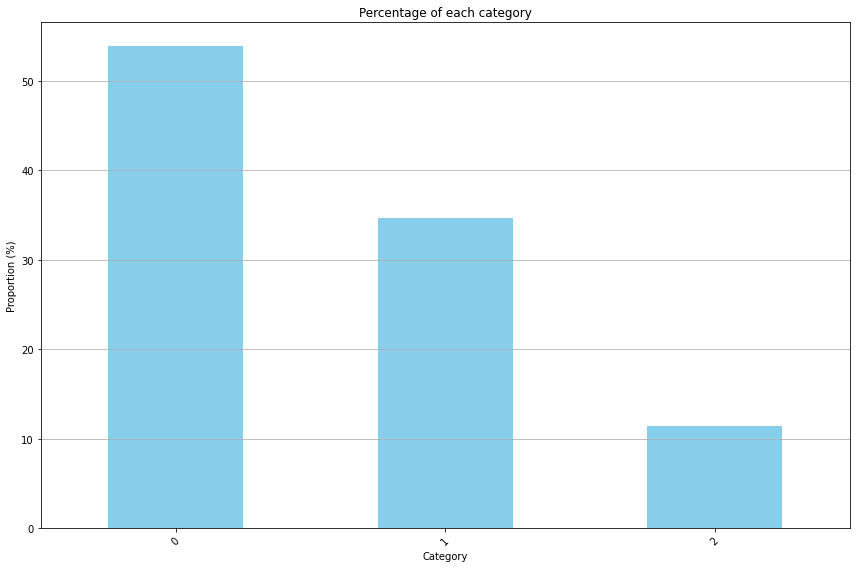

In [3]:
import matplotlib.pyplot as plt

df = pd.read_csv(csv_file_path)

category_counts = df['DR grade'].value_counts() 
total = len(df)
category_percentage = category_counts / total * 100

print(category_percentage)

#图形展示

plt.figure(figsize=(12, 8))
category_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of each category')
plt.ylabel('Proportion (%)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


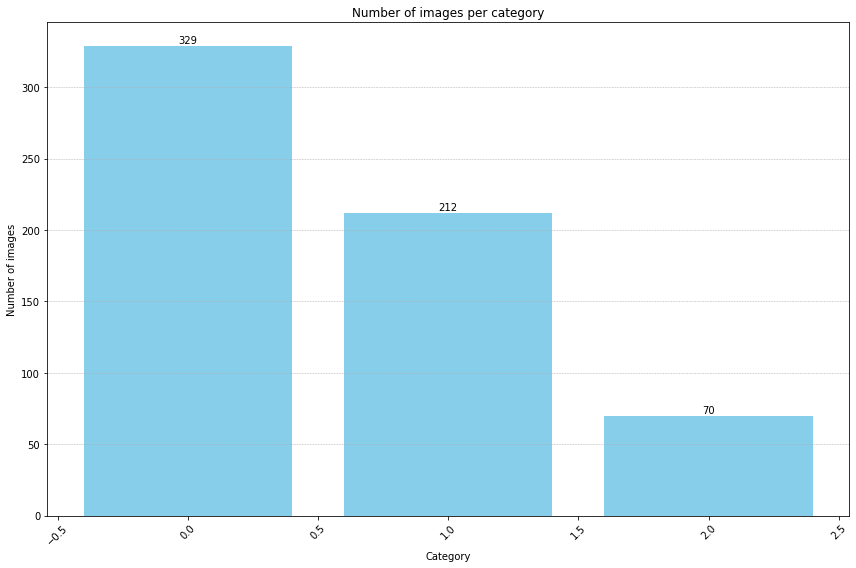

In [5]:
plt.figure(figsize=(12, 8))
bars = plt.bar(category_counts.index, category_counts.values, color='skyblue')

# 添加数值标签到每个条形上
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.title('Number of images per category')
plt.ylabel('Number of images')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

In [4]:
image_files = [os.path.join(data_path, fname) for fname in os.listdir(data_path) if fname.endswith('.png')]

to_tensor = transforms.ToTensor()

sum_pixel_values = 0
num_pixels = 0
for image_file in image_files:
    image = Image.open(image_file).convert('L')  # 转换为灰度图像
    tensor_image = to_tensor(image)
    sum_pixel_values += tensor_image.sum()
    num_pixels += tensor_image.numel()

mean = sum_pixel_values / num_pixels

sum_squared_error = 0
for image_file in image_files:
    image = Image.open(image_file).convert('L')  # 转换为灰度图像
    tensor_image = to_tensor(image)
    sum_squared_error += ((tensor_image - mean) ** 2).sum()

stddev = np.sqrt(sum_squared_error / num_pixels)

print(f"Mean: {mean.item()}")
print(f"Standard Deviation: {stddev.item()}")


Mean: 0.4134276509284973
Standard Deviation: 0.27755147218704224


In [5]:
mean_rounded = round(0.4134276509284973, 3)
std_rounded = round(0.27755147218704224, 3)

print(mean_rounded)
print(std_rounded)


0.413
0.278
